In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [17]:
img = cv2.imread('image.jpeg')

In [18]:
cv2.imshow("Citra Asli", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
#Konversi gambar ke grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Terapkan efek Gaussian blur ke gambar
blur = cv2.GaussianBlur(gray, (5, 5), 0)

#Ambang batas gambar
ret, thresh = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY)

#Temukan kontur pada gambar
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#Temukan kontur terbesar pada gambar
cnt = max(contours, key=cv2.contourArea)

#Buat mask untuk kontur terbesar
mask = np.zeros_like(img, dtype=np.uint8)
cv2.drawContours(mask, [cnt], -1, (255, 255, 255), thickness=cv2.FILLED)

#Konversi mask ke grayscale
mask_gray = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

#Terapkan mask ke gambar asli
masked = cv2.bitwise_and(img, img, mask=mask_gray)

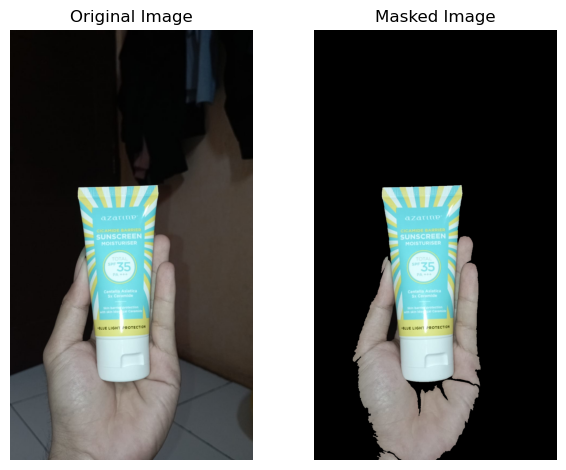

In [14]:
#Tampilkan citra asli
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Citra Asli')
plt.axis('off')

#Tampilkan citra hasil 
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(masked, cv2.COLOR_BGR2RGB))
plt.title('Citra Output')
plt.axis('off')

plt.tight_layout()
plt.show()

In [15]:
#Menyimpan Hasil Removeal Dalam Bentuk png
cv2.imwrite("hasil_removal_bg.png",masked)

True